In [ ]:
import pandas as pd
import numpy as np
import cv2
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
images_folder = '/content/drive/MyDrive/Flicker8k_Dataset'
captions_folder = '/content/drive/MyDrive/Flickr8k_text/Flickr8k.token.txt'
training = '/content/drive/MyDrive/Flickr8k_text/Flickr_8k.trainImages.txt'
validation = '/content/drive/MyDrive/Flickr8k_text/Flickr_8k.devImages.txt'

In [ ]:
captions = open(captions_folder, 'r').read().split("\n")
x_train = open(training, 'r').read().split("\n")
x_test = open(validation, 'r').read().split("\n")

In [ ]:
x_train[:5]

['2513260012_03d33305cf.jpg',
 '2903617548_d3e38d7f88.jpg',
 '3338291921_fe7ae0c8f8.jpg',
 '488416045_1c6d903fe0.jpg',
 '2644326817_8f45080b87.jpg']

In [ ]:
print("Number of Training Images {}".format(len(x_train)))

Number of Training Images 6001


In [ ]:
x_test[:5]

['2090545563_a4e66ec76b.jpg',
 '3393035454_2d2370ffd4.jpg',
 '3695064885_a6922f06b2.jpg',
 '1679557684_50a206e4a9.jpg',
 '3582685410_05315a15b8.jpg']

In [ ]:
print("Number of Test Images {}".format(len(x_test)))

Number of Test Images 1001


In [ ]:
images = glob(images_folder+'/*.jpg')
len(images)

8091

In [ ]:
images[:5]

['/content/drive/MyDrive/Flicker8k_Dataset/3183777589_460a4f445b.jpg',
 '/content/drive/MyDrive/Flicker8k_Dataset/3362871440_6c0f27c480.jpg',
 '/content/drive/MyDrive/Flicker8k_Dataset/3416013671_98b5c75046.jpg',
 '/content/drive/MyDrive/Flicker8k_Dataset/2875583266_4da13ae12d.jpg',
 '/content/drive/MyDrive/Flicker8k_Dataset/2678612999_893ed671f8.jpg']

In [ ]:
tokens = {}

for ix in range(len(captions)):
  try:
    temp = captions[ix].split("#")
    if temp[0] in tokens:
        tokens[temp[0]].append(temp[1][2:])
    else:
        tokens[temp[0]] = [temp[1][2:]]
  except:
    pass

In [ ]:
from keras.preprocessing import image, sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Checking a sample picture with its corresponding captions

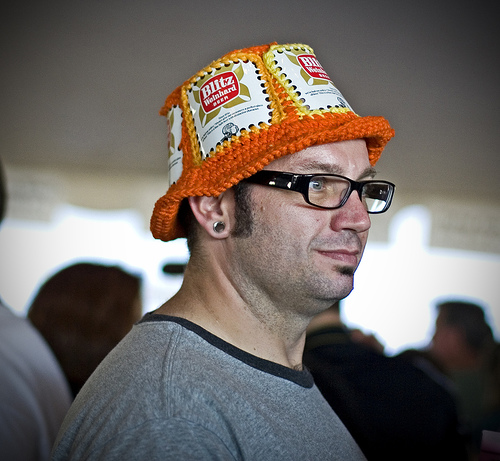

A man in an orange hat starring at something .
A man wears an orange hat and glasses .
A man with gauges and glasses is wearing a Blitz hat .
A man with glasses is wearing a beer can crocheted hat .
The man with pierced ears is wearing glasses and an orange hat .


In [ ]:
temp = captions[20].split("#")
from IPython.display import Image, display
Z = Image(filename=images_folder+'/'+temp[0])
display(Z)

for ix in range(len(tokens[temp[0]])):
  print(tokens[temp[0]][ix])

# Encoding with ResNet50 and imagenet

In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
model_incept = ResNet50(weights = 'imagenet', include_top = True)

In [ ]:
model_incept.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
from keras.models import Model
last_layer = model_incept.layers[-2].output
Resnet = Model(inputs = model_incept.input,outputs = last_layer)
Resnet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
train_encoded_images = {}

count = 0

for i in images:

  img_name = i.split('/')[-1]

  if img_name in x_train:

     img = cv2.imread(i)
     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
     img = cv2.resize(img, (224,224))

     img = img.reshape(1,224,224,3)
     pred = Resnet.predict(img).reshape(2048,)

     train_encoded_images[img_name] = pred

     count += 1
     print(count)

print(len(train_encoded_images))

Streaming output truncated to the last 5000 lines.
3501
1/1 [==============================] - 0s 27ms/step
3502
1/1 [==============================] - 0s 25ms/step
3503
1/1 [==============================] - 0s 21ms/step
3504
1/1 [==============================] - 0s 22ms/step
3505
1/1 [==============================] - 0s 23ms/step
3506
1/1 [==============================] - 0s 23ms/step
3507
1/1 [==============================] - 0s 34ms/step
3508
1/1 [==============================] - 0s 37ms/step
3509
1/1 [==============================] - 0s 35ms/step
3510
1/1 [==============================] - 0s 40ms/step
3511
1/1 [==============================] - 0s 38ms/step
3512
1/1 [==============================] - 0s 34ms/step
3513
1/1 [==============================] - 0s 34ms/step
3514
1/1 [==============================] - 0s 34ms/step
3515
1/1 [==============================] - 0s 39ms/step
3516
1/1 [==============================] - 0s 33ms/step
3517
1/1 [===========================

In [ ]:
trainImages_columns = ['Images']
df_trainImages = pd.read_csv('/content/drive/MyDrive/Flickr8k_text/Flickr_8k.trainImages.txt', names = trainImages_columns, delimiter='\t', encoding='latin1')
df_trainImages

,Images
0,2513260012_03d33305cf.jpg
1,2903617548_d3e38d7f88.jpg
2,3338291921_fe7ae0c8f8.jpg
3,488416045_1c6d903fe0.jpg
4,2644326817_8f45080b87.jpg
...,...
5995,3488512097_e500cb499f.jpg
5996,964197865_0133acaeb4.jpg
5997,58363930_0544844edd.jpg
5998,3107889179_106d223345.jpg


In [ ]:
captions_columns = ['Images', 'Captions']
df_captions = pd.read_csv('/content/drive/MyDrive/Flickr8k_text/Flickr8k.token.txt', names = captions_columns, delimiter='\t', encoding='latin1')
df_captions

,Images,Captions
0,1000268201_693b08cb0e.jpg#0,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg#1,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg#2,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg#3,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg#4,A little girl in a pink dress going into a woo...
...,...,...
40455,997722733_0cb5439472.jpg#0,A man in a pink shirt climbs a rock face
40456,997722733_0cb5439472.jpg#1,A man is rock climbing high in the air .
40457,997722733_0cb5439472.jpg#2,A person in a red shirt climbing up a rock fac...
40458,997722733_0cb5439472.jpg#3,A rock climber in a red shirt .


In [ ]:
df_captions['Images'] = df_captions['Images'].str[:-2]
df_captions

,Images,Captions
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
...,...,...
40455,997722733_0cb5439472.jpg,A man in a pink shirt climbs a rock face
40456,997722733_0cb5439472.jpg,A man is rock climbing high in the air .
40457,997722733_0cb5439472.jpg,A person in a red shirt climbing up a rock fac...
40458,997722733_0cb5439472.jpg,A rock climber in a red shirt .


In [ ]:
df_captions_train = df_captions[df_captions['Images'].isin(df_trainImages['Images'])]
df_captions_train

,Images,Captions
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
...,...,...
40450,997338199_7343367d7f.jpg,A person stands near golden walls .
40451,997338199_7343367d7f.jpg,a woman behind a scrolled wall is writing
40452,997338199_7343367d7f.jpg,A woman standing near a decorated wall writes .
40453,997338199_7343367d7f.jpg,The walls are covered in gold and patterns .


In [ ]:
def modify_text(text):
  text = text.lower()
  text = '<start> '+ text +' <end>'
  return text

en_captions_train = df_captions_train
en_captions_train['Captions'] = en_captions_train.Captions.apply(modify_text)

<ipython-input-23-8c205029f898>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_captions_train['Captions'] = en_captions_train.Captions.apply(modify_text)


# Encoding captions of corresponding train images

In [ ]:
en_captions_train

,Images,Captions
0,1000268201_693b08cb0e.jpg,<start> a child in a pink dress is climbing up...
1,1000268201_693b08cb0e.jpg,<start> a girl going into a wooden building . ...
2,1000268201_693b08cb0e.jpg,<start> a little girl climbing into a wooden p...
3,1000268201_693b08cb0e.jpg,<start> a little girl climbing the stairs to h...
4,1000268201_693b08cb0e.jpg,<start> a little girl in a pink dress going in...
...,...,...
40450,997338199_7343367d7f.jpg,<start> a person stands near golden walls . <end>
40451,997338199_7343367d7f.jpg,<start> a woman behind a scrolled wall is writ...
40452,997338199_7343367d7f.jpg,<start> a woman standing near a decorated wall...
40453,997338199_7343367d7f.jpg,<start> the walls are covered in gold and patt...


In [ ]:
test_encoded_images = {}

tokens_test = {}

count = 0

for i in images:

  img_name = i.split('/')[-1]

  if img_name in x_test:

    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))

    img = img.reshape(1,224,224,3)
    pred = Resnet.predict(img).reshape(2048,)

    test_encoded_images[img_name] = pred

    count += 1
    print(count)

print(len(test_encoded_images))

1/1 [==============================] - 0s 27ms/step
1
1/1 [==============================] - 0s 23ms/step
2
1/1 [==============================] - 0s 24ms/step
3
1/1 [==============================] - 0s 27ms/step
4
1/1 [==============================] - 0s 21ms/step
5
1/1 [==============================] - 0s 23ms/step
6
1/1 [==============================] - 0s 21ms/step
7
1/1 [==============================] - 0s 22ms/step
8
1/1 [==============================] - 0s 22ms/step
9
1/1 [==============================] - 0s 22ms/step
10
1/1 [==============================] - 0s 23ms/step
11
1/1 [==============================] - 0s 24ms/step
12
1/1 [==============================] - 0s 24ms/step
13
1/1 [==============================] - 0s 24ms/step
14
1/1 [==============================] - 0s 24ms/step
15
1/1 [==============================] - 0s 23ms/step
16
1/1 [==============================] - 0s 25ms/step
17
1/1 [==============================] - 0s 23ms/step
18
1/1 [==============

In [ ]:
testImages_columns = ['Images']
df_testImages = pd.read_csv('/content/drive/MyDrive/Flickr8k_text/Flickr_8k.devImages.txt', names = testImages_columns, delimiter='\t', encoding='latin1')
df_testImages

,Images
0,2090545563_a4e66ec76b.jpg
1,3393035454_2d2370ffd4.jpg
2,3695064885_a6922f06b2.jpg
3,1679557684_50a206e4a9.jpg
4,3582685410_05315a15b8.jpg
...,...
995,3487378989_c051d2715b.jpg
996,2189181027_a445b13438.jpg
997,2631625732_75b714e685.jpg
998,2665586311_9a5f4e3fbe.jpg


In [ ]:
df_captions_test = df_captions[df_captions['Images'].isin(df_testImages['Images'])]
df_captions_test

,Images,Captions
80,1022454332_6af2c1449a.jpg,A child and a woman are at waters edge in a bi...
81,1022454332_6af2c1449a.jpg,a large lake with a lone duck swimming in it w...
82,1022454332_6af2c1449a.jpg,A little boy at a lake watching a duck .
83,1022454332_6af2c1449a.jpg,A young boy waves his hand at the duck in the ...
84,1022454332_6af2c1449a.jpg,"Two people are at the edge of a lake , facing ..."
...,...,...
40430,989851184_9ef368e520.jpg,A black dog has a dumbbell in his mouth .
40431,989851184_9ef368e520.jpg,A black dog has a dumbbell in his mouth lookin...
40432,989851184_9ef368e520.jpg,A black dog holding a weight in its mouth stan...
40433,989851184_9ef368e520.jpg,A black dog holds a small white dumbbell in it...


In [ ]:
def modify_text(text):
  text = text.lower()
  text = '<start> '+ text +' <end>'
  return text

en_captions_test = df_captions_test
en_captions_test['Captions'] = en_captions_test.Captions.apply(modify_text)

<ipython-input-28-64e39bc2420b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_captions_test['Captions'] = en_captions_test.Captions.apply(modify_text)


# Encoding captions of corresponding test images

In [ ]:
en_captions_test

,Images,Captions
80,1022454332_6af2c1449a.jpg,<start> a child and a woman are at waters edge...
81,1022454332_6af2c1449a.jpg,<start> a large lake with a lone duck swimming...
82,1022454332_6af2c1449a.jpg,<start> a little boy at a lake watching a duck...
83,1022454332_6af2c1449a.jpg,<start> a young boy waves his hand at the duck...
84,1022454332_6af2c1449a.jpg,"<start> two people are at the edge of a lake ,..."
...,...,...
40430,989851184_9ef368e520.jpg,<start> a black dog has a dumbbell in his mout...
40431,989851184_9ef368e520.jpg,<start> a black dog has a dumbbell in his mout...
40432,989851184_9ef368e520.jpg,<start> a black dog holding a weight in its mo...
40433,989851184_9ef368e520.jpg,<start> a black dog holds a small white dumbbe...


# Creating Vocabulary

In [ ]:
data = en_captions_train.values
data.shape

(30000, 2)

In [ ]:
data

array([['1000268201_693b08cb0e.jpg',
        '<start> a child in a pink dress is climbing up a set of stairs in an entry way . <end>'],
       ['1000268201_693b08cb0e.jpg',
        '<start> a girl going into a wooden building . <end>'],
       ['1000268201_693b08cb0e.jpg',
        '<start> a little girl climbing into a wooden playhouse . <end>'],
       ...,
       ['997338199_7343367d7f.jpg',
        '<start> a woman standing near a decorated wall writes . <end>'],
       ['997338199_7343367d7f.jpg',
        '<start> the walls are covered in gold and patterns . <end>'],
       ['997338199_7343367d7f.jpg',
        '<start> woman writing on a pad in room with gold , decorated walls . <end>']],
      dtype=object)

In [ ]:
sentences = []
for ix in range(data.shape[0]):
    sentences.append(data[ix, 1])

print(len(sentences))

30000


In [ ]:
words = [i.split() for i in sentences]

In [ ]:
print(words[0])
len(words)

['<start>', 'a', 'child', 'in', 'a', 'pink', 'dress', 'is', 'climbing', 'up', 'a', 'set', 'of', 'stairs', 'in', 'an', 'entry', 'way', '.', '<end>']


30000

In [ ]:
unique = []

for i in words:
  unique.extend(i)

In [ ]:
unique[:3]

['<start>', 'a', 'child']

In [ ]:
len(unique)

413454

In [ ]:
unique = list(set(unique))
vocab_size = len(unique)

vocab_size

7707

In [ ]:
word_2_indices = {val:index for index, val in enumerate(unique)}
indices_2_word = {index:val for index, val in enumerate(unique)}

In [ ]:
word_2_indices['<start>']

6492

In [ ]:
indices_2_word[6492]

'<start>'

In [ ]:
max_len = 0

for i in sentences:

  i = i.split()

  if len(i) > max_len:

    max_len = len(i)

print(max_len)

40


# Building padded sequences and next words

In [ ]:
padded_sequences, subsequent_words = [], []

for ix in range(data.shape[0]):

  prtl_seqs = []
  next_words = []
  text = data[ix, 1].split()
  text = [word_2_indices[i] for i in text]

  for i in range(1, len(text)):

    prtl_seqs.append(text[:i])
    next_words.append(text[i])

  padded_prtl_seqs = pad_sequences(prtl_seqs, max_len, padding = 'post')
  next_words_1hot = np.zeros([len(next_words), vocab_size], dtype = np.bool)

  for i,next_word in enumerate(next_words):
    next_words_1hot[i, next_word] = 1

  padded_sequences.append(padded_prtl_seqs)
  subsequent_words.append(next_words_1hot)

padded_sequences = np.asarray(padded_sequences)
subsequent_words = np.asarray(subsequent_words)

print(padded_sequences.shape)
print(subsequent_words.shape)

<ipython-input-43-c552b83c2a42>:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  next_words_1hot = np.zeros([len(next_words), vocab_size], dtype = np.bool)


(30000,)
(30000,)


<ipython-input-43-c552b83c2a42>:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  padded_sequences = np.asarray(padded_sequences)
<ipython-input-43-c552b83c2a42>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  subsequent_words = np.asarray(subsequent_words)


In [ ]:
padded_sequences

array([array([[6492,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
                  0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
                  0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
                  0,    0,    0,    0,    0,    0,    0],
              [6492, 5031,    0,    0,    0,    0,    0,    0,    0,    0,    0,
                  0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
                  0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
                  0,    0,    0,    0,    0,    0,    0],
              [6492, 5031,  715,    0,    0,    0,    0,    0,    0,    0,    0,
                  0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
                  0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
                  0,    0,    0,    0,    0,    0,    0],
              [6492, 5031,  715, 5068,    0,    0,    0,    0,    0,    0,    0,
                

In [ ]:
for ix in range(len(padded_sequences[0])):
    for iy in range(max_len):
        print(indices_2_word[padded_sequences[0][ix][iy]],)
    print("\n")

print(len(padded_sequences[0]))

<start>
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved


<start>
a
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved


<start>
a
child
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved


<start>
a
child
in
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
gloved
glo

In [ ]:
imgs = []

for ix in range(data.shape[0]):
    imgs.append(train_encoded_images[data[ix, 0]])

imgs = np.asarray(imgs)
print(imgs.shape)

(30000, 2048)


In [ ]:
imgs

array([[0.16725844, 0.46361923, 0.00352366, ..., 0.11895234, 0.4263413 ,
        1.3225999 ],
       [0.16725844, 0.46361923, 0.00352366, ..., 0.11895234, 0.4263413 ,
        1.3225999 ],
       [0.16725844, 0.46361923, 0.00352366, ..., 0.11895234, 0.4263413 ,
        1.3225999 ],
       ...,
       [0.68254274, 1.7967708 , 0.        , ..., 1.3895731 , 0.04285159,
        0.73885596],
       [0.68254274, 1.7967708 , 0.        , ..., 1.3895731 , 0.04285159,
        0.73885596],
       [0.68254274, 1.7967708 , 0.        , ..., 1.3895731 , 0.04285159,
        0.73885596]], dtype=float32)

In [ ]:
batch_of_images = 1500

In [ ]:
captions_pd = np.zeros([0, max_len])
next_words = np.zeros([0, vocab_size])

for ix in range(batch_of_images):
    captions_pd = np.concatenate([captions_pd, padded_sequences[ix]])
    next_words = np.concatenate([next_words, subsequent_words[ix]])

print(captions_pd.shape)
print(next_words.shape)

(19510, 40)
(19510, 7707)


In [ ]:
images_pd = []

for ix in range(batch_of_images):
    for iy in range(padded_sequences[ix].shape[0]):
        images_pd.append(imgs[ix])

images_pd = np.asarray(images_pd)

print(images_pd.shape)

(19510, 2048)


In [ ]:
image_names = []

for ix in range(batch_of_images):
    for iy in range(padded_sequences[ix].shape[0]):
        image_names.append(data[ix, 0])

image_names = np.asarray(image_names)

print(len(image_names))

19510


# Model Building and Execution

In [ ]:
from keras.layers import Dense, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector, Concatenate
from keras.models import Sequential, Model
from keras.optimizers import Nadam

In [ ]:
embedding_size = 128

In [ ]:
pict_model = Sequential()

pict_model.add(Dense(embedding_size, input_shape = (2048,), activation = 'relu'))
pict_model.add(RepeatVector(max_len))

pict_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               262272    
                                                                 
 repeat_vector (RepeatVecto  (None, 40, 128)           0         
 r)                                                              
                                                                 
Total params: 262272 (1.00 MB)
Trainable params: 262272 (1.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
desc_model = Sequential()

desc_model.add(Embedding(input_dim = vocab_size, output_dim = embedding_size, input_length = max_len))
desc_model.add(LSTM(256, return_sequences=True))
desc_model.add(TimeDistributed(Dense(embedding_size)))

desc_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 128)           986496    
                                                                 
 lstm (LSTM)                 (None, 40, 256)           394240    
                                                                 
 time_distributed (TimeDist  (None, 40, 128)           32896     
 ributed)                                                        
                                                                 
Total params: 1413632 (5.39 MB)
Trainable params: 1413632 (5.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
merged_layer = Concatenate()([pict_model.output, desc_model.output])
z = LSTM(256, return_sequences=True)(merged_layer)
z = LSTM(512, return_sequences = False)(z)
z = Dense(vocab_size)(z)
out = Activation('softmax')(z)
imcap_model = Model(inputs = [pict_model.input, desc_model.input], outputs = out)

imcap_model.compile(loss = 'categorical_crossentropy', optimizer = Nadam(), metrics = ['accuracy'])
imcap_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 embedding_input (InputLaye  [(None, 40)]                 0         []                            
 r)                                                                                               
                                                                                                  
 dense_input (InputLayer)    [(None, 2048)]               0         []                            
                                                                                                  
 embedding (Embedding)       (None, 40, 128)              986496    ['embedding_input[0][0]']     
                                                                                                  
 dense (Dense)               (None, 128)                  262272    ['dense_input[0][0]']   

In [ ]:
imcap_model.fit([images_pd, captions_pd], next_words, batch_size = 512, epochs = 200)

Epoch 1/200
39/39 [==============================] - 18s 176ms/step - loss: 5.7680 - accuracy: 0.1217
Epoch 2/200
39/39 [==============================] - 6s 161ms/step - loss: 5.1477 - accuracy: 0.1254
Epoch 3/200
39/39 [==============================] - 6s 148ms/step - loss: 5.1296 - accuracy: 0.1254
Epoch 4/200
39/39 [==============================] - 5s 130ms/step - loss: 5.1254 - accuracy: 0.1254
Epoch 5/200
39/39 [==============================] - 5s 140ms/step - loss: 5.1092 - accuracy: 0.1254
Epoch 6/200
39/39 [==============================] - 5s 134ms/step - loss: 5.0975 - accuracy: 0.1254
Epoch 7/200
39/39 [==============================] - 5s 130ms/step - loss: 5.0828 - accuracy: 0.1254
Epoch 8/200
39/39 [==============================] - 5s 129ms/step - loss: 5.0243 - accuracy: 0.1254
Epoch 9/200
39/39 [==============================] - 5s 132ms/step - loss: 4.9735 - accuracy: 0.1254
Epoch 10/200
39/39 [==============================] - 5s 134ms/step - loss: 4.9412 - accur

# Predicting captions of a test image

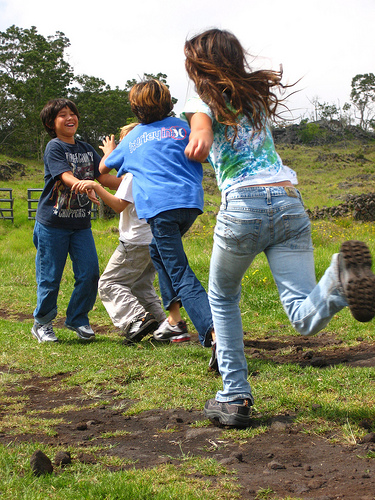

In [ ]:
img_loc = x_test[7]

Z = Image(filename  = images_folder+'/'+img_loc)
display(Z)

In [ ]:
img = cv2.imread(images_folder+'/'+img_loc)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224))
img = img.reshape(1,224,224,3)
pred = Resnet.predict(img).reshape(2048,)

test_img = pred

1/1 [==============================] - 0s 120ms/step


In [ ]:
def predict_captions(image):
    start_word = ["<start>"]
    while True:
        prtl_caps = [word_2_indices[i] for i in start_word]
        prtl_caps = sequence.pad_sequences([prtl_caps], maxlen = max_len, padding = 'post')
        preds = imcap_model.predict([np.array([image]), np.array(prtl_caps)])
        word_pred = indices_2_word[np.argmax(preds[0])]
        start_word.append(word_pred)

        if word_pred == "<end>" or len(start_word) > max_len:
            break

    return ' '.join(start_word[1:-1])

Argmax_Search = predict_captions(test_img)

1/1 [==============================] - 0s 31ms/step


In [ ]:
def beam_search_predictions(image, beam_index = 3):
    start = [word_2_indices["<start>"]]

    start_word = [[start, 0.0]]

    while len(start_word[0][0]) < max_len:
        temp = []
        for s in start_word:
            prtl_caps = sequence.pad_sequences([s[0]], maxlen=max_len, padding='post')
            preds = imcap_model.predict([np.array([image]), np.array(prtl_caps)])

            word_preds = np.argsort(preds[0])[-beam_index:]

            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
                prob += preds[0][w]
                temp.append([next_cap, prob])

        start_word = temp
        start_word = sorted(start_word, reverse=False, key=lambda l: l[1])
        start_word = start_word[-beam_index:]

    start_word = start_word[-1][0]
    intermediate_caption = [indices_2_word[i] for i in start_word]

    final_caption = []

    for i in intermediate_caption:
        if i != '<end>':
            final_caption.append(i)
        else:
            break

    final_caption = ' '.join(final_caption[1:])
    return final_caption


beam_search_index_3 = beam_search_predictions(test_img, beam_index=3)
beam_search_index_5 = beam_search_predictions(test_img, beam_index=5)
beam_search_index_7 = beam_search_predictions(test_img, beam_index=7)

1/1 [==============================] - 0s 25ms/step


In [ ]:
print("Argmax Prediction : ",)
print(Argmax_Search)
print("Beam Search Prediction with Index = 3 : ",)
print(beam_search_index_3)
print("Beam Search Prediction with Index = 5 : ",)
print(beam_search_index_5)
print("Beam Search Prediction with Index = 7 : ",)
print(beam_search_index_7)

Argmax Prediction : 
a girl in a shirt shirt playing playing on the on the the the .
Beam Search Prediction with Index = 3 : 
a young girl wearing playing on on on on on the .
Beam Search Prediction with Index = 5 : 
a young girl wearing playing on on on on on the .
Beam Search Prediction with Index = 7 : 
a young girl wearing playing on on on her .


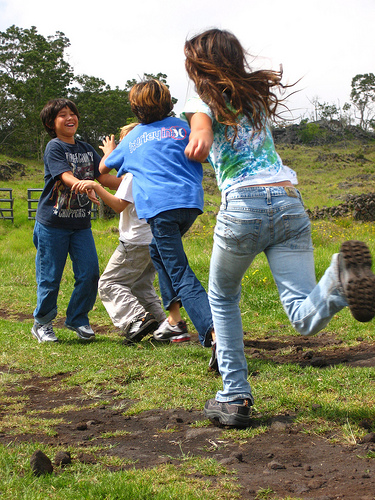

In [ ]:
display(Z)